In [2]:
from pklshop.data import *
from pklshop.game import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
%load_ext autoreload
%autoreload 2

In [213]:
sns.set()
sns.set_palette('Accent')
# sns.set(rc={'axes.facecolor':'60A3AB', 'figure.facecolor':'60A3AB', "font.size":16, "axes.titlesize":18, "axes.labelsize":24})
sns.set(rc={'axes.facecolor':'499CB3', 'figure.facecolor':'499CB3', "font.size":16, "axes.titlesize":18, "axes.labelsize":24})


In [ ]:
#18BC9C is the main one
#68DFFF
#9EEE8D

#extra
#499CB3
#0B171A

Let's look at the overall success rate of 3rd shot types (defined as whether the rally was won or not) for pro matches

In [4]:
pro_games_df = game[game.skill_lvl == 'Pro']

In [171]:
num_drops, num_drops_won = np.zeros(len(pro_games_df)), np.zeros(len(pro_games_df))
num_drives, num_drives_won = np.zeros(len(pro_games_df)), np.zeros(len(pro_games_df))
num_lobs, num_lobs_won = np.zeros(len(pro_games_df)), np.zeros(len(pro_games_df))

for i, g_id in enumerate(pro_games_df.game_id.values):
    g = Game(g_id)
    num_drops[i], num_drops_won[i] = g.third_success("Drop")
    num_drives[i], num_drives_won[i] = g.third_success("Drive")
    num_lobs[i], num_lobs_won[i] = g.third_success("Lob")

drop_success_rate_tot = sum(num_drops_won) / sum(num_drops)
drive_success_rate_tot = sum(num_drives_won) / sum(num_drives)
lob_success_rate_tot = sum(num_lobs_won) / sum(num_lobs)
overall_success_rate_tot = (sum(num_drops_won) + sum(num_drives_won) + sum(num_lobs_won)) / (sum(num_drops) + sum(num_drives) + sum(num_lobs))

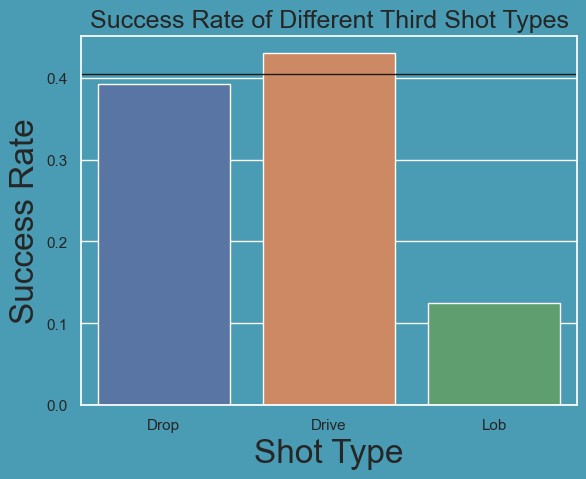

In [214]:
sns.barplot(x=["Drop", "Drive", "Lob"], y=[drop_success_rate_tot, drive_success_rate_tot, lob_success_rate_tot])
plt.axhline(y=overall_success_rate_tot,linewidth=1, color='k')
plt.title("Success Rate of Different Third Shot Types")
plt.xlabel("Shot Type")
plt.ylabel("Success Rate")
plt.show()

This doesn't tell us about the variation among games. Let's look at the distribution of 3rd shot types over all games in the database

In [86]:
def divide_ignore_zeros(numerator, denominator):
    return np.array([numerator[i] / denominator[i] for i in range(len(numerator)) if denominator[i] != 0])

In [87]:
drop_success_rate_arr = divide_ignore_zeros(num_drops_won, num_drops)
drive_success_rate_arr = divide_ignore_zeros(num_drives_won, num_drives)
lob_success_rate_arr = divide_ignore_zeros(num_lobs_won, num_lobs)

There are very few lobs so let's exclude them for now

In [88]:
total_success_rate_arr = sum(num_drops_won + num_drives_won)/sum(num_drops + num_drives)

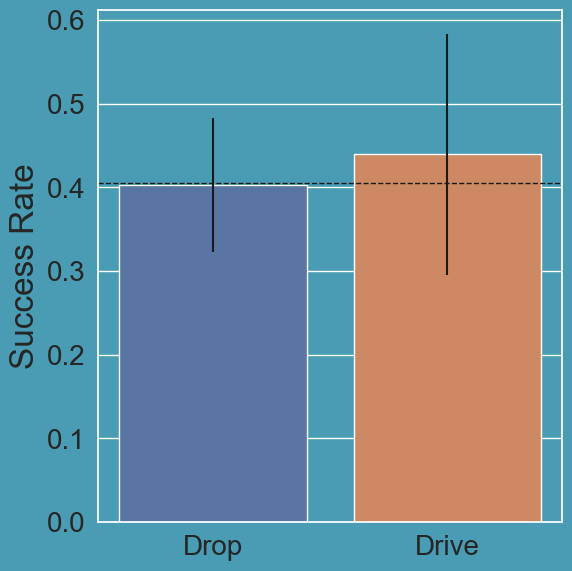

In [217]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.barplot(x=["Drop", "Drive"], y=[np.mean(drop_success_rate_arr), np.mean(drive_success_rate_arr)])
plt.errorbar(x=[0, 1], y=[np.mean(drop_success_rate_arr), np.mean(drive_success_rate_arr)], yerr=[np.std(drop_success_rate_arr), np.std(drive_success_rate_arr)], fmt='none', ecolor='k')
plt.axhline(y=overall_success_rate_tot, linewidth=1, color='k', ls = '--')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlabel("Shot Type")
plt.ylabel("Success Rate")

plt.tight_layout()
plt.savefig("../figures/third_shot_overall.png")
plt.show()

Now look on a game by game basis

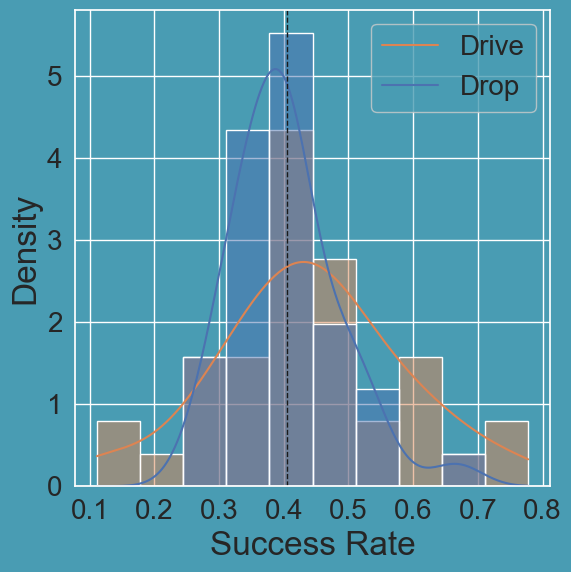

In [216]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

sns.histplot([drop_success_rate_arr, drive_success_rate_arr], bins=10, kde=True, stat='density', common_norm=False, legend=False)
plt.axvline(x=overall_success_rate_tot, linewidth=1, color='k', ls = '--')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(labels=['Drive', 'Drop'], fontsize=20)
plt.xlabel("Success Rate")
plt.ylabel("Density")

plt.tight_layout()
plt.savefig("../figures/third_shot_distribution.png")
plt.show()


In [157]:
print(len(pro_games_df))
print(sum(num_drops + num_drives))

39
1635.0


Now let's look at third shot error rates

In [180]:
num_drops, num_drops_errors = np.zeros(len(pro_games_df)), np.zeros(len(pro_games_df))
num_drives, num_drives_errors = np.zeros(len(pro_games_df)), np.zeros(len(pro_games_df))
num_lobs, num_lobs_errors = np.zeros(len(pro_games_df)), np.zeros(len(pro_games_df))

for i, g_id in enumerate(pro_games_df.game_id.values):
    g = Game(g_id)
    num_drops[i], num_drops_errors[i] = g.third_errors("Drop")
    num_drives[i], num_drives_errors[i] = g.third_errors("Drive")
    num_lobs[i], num_lobs_errors[i] = g.third_errors("Lob")

drop_error_rate_tot = sum(num_drops_won) / sum(num_drops)
drive_error_rate_tot = sum(num_drives_won) / sum(num_drives)
lob_error_rate_tot = sum(num_lobs_won) / sum(num_lobs)

In [195]:
drop_error_rate_arr = divide_ignore_zeros(num_drops_errors, num_drops)
drive_error_rate_arr = divide_ignore_zeros(num_drives_errors, num_drives)
lob_error_rate_arr = divide_ignore_zeros(num_lobs_errors, num_lobs)
overall_error_rate_tot = (sum(num_drops_errors) + sum(num_drives_errors)) / (sum(num_drops) + sum(num_drives) )


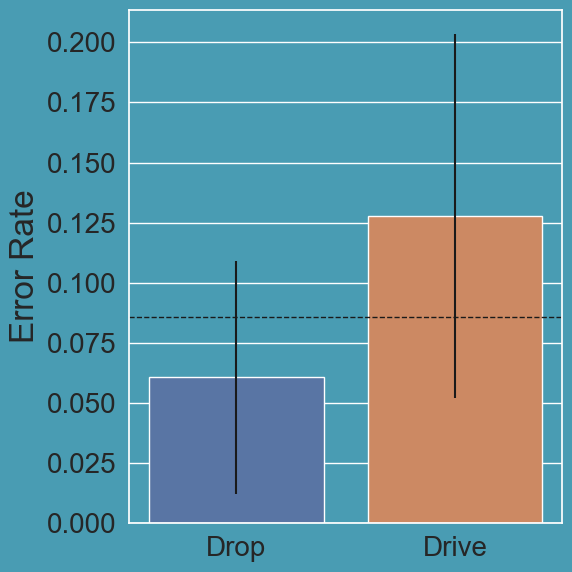

In [218]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
sns.barplot(x=["Drop", "Drive"], y=[np.mean(drop_error_rate_arr), np.mean(drive_error_rate_arr)])
plt.errorbar(x=[0, 1], y=[np.mean(drop_error_rate_arr), np.mean(drive_error_rate_arr)], yerr=[np.std(drop_error_rate_arr), np.std(drive_error_rate_arr)], fmt='none', ecolor='k')
plt.axhline(y=overall_error_rate_tot, linewidth=1, color='k', ls = '--')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xlabel("Shot Type")
plt.ylabel("Error Rate")

plt.tight_layout()
plt.savefig("../figures/third_shot_error_overall.png")
plt.show()

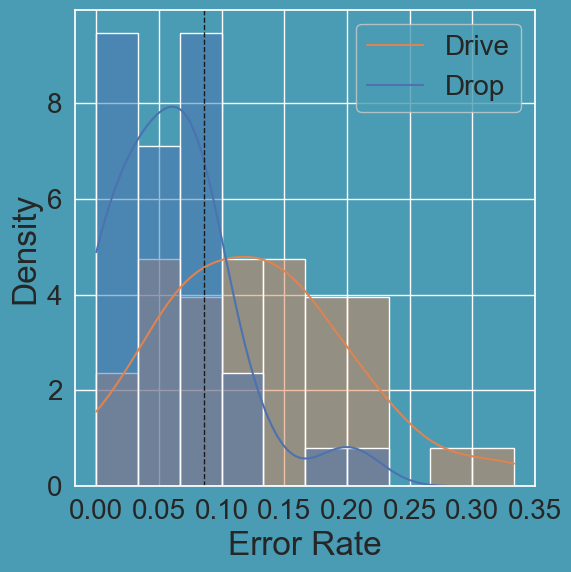

In [219]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

sns.histplot([drop_error_rate_arr, drive_error_rate_arr], bins=10, kde=True, stat='density', common_norm=False, legend=False)
plt.axvline(x=overall_error_rate_tot, linewidth=1, color='k', ls = '--')

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(labels=['Drive', 'Drop'], fontsize=20)
plt.xlabel("Error Rate")
plt.ylabel("Density")

plt.tight_layout()
plt.savefig("../figures/third_shot_error_distribution.png")
plt.show()


todo: redo the success rate analysis but only look at rallies where the 3rd shot is in

In [174]:
#todo See how this changes assuming the 3rd shot is in